## Capstone Project: The battle of neighbourhoods

 ### ** Scenario and Background**

   Mr. X lives in the city of London with his wife. They love their neighborhood, mainly because of all the great amenities, transport facilities and other types of venues that exist in the neighborhood, such as gourmet fast food joints, multi cuisine restaurants, art gallery, pharmacies, parks, and so on. Mr. X has received a job offer from a great company in Manhattan, New York with great career prospects. However given the far distance from his current place he unfortunately must move if he decide to accept the offer. Wouldn't it be great if he is able to determine neighborhoods in the new city that are exactly the same as his current neighborhood, and if not perhaps similar neighborhoods that are at least closer to his new job? 
 

### **Problem to be solved:**
  
   To develop a system/project/map that will help Mr. X to get an idea about the transport facilities, different venues and a rental apartment in Manhattan, New York that offers characteristics and benefits similar to his current neighborhood.  
      The system will provide the details about all the subway stations, rental places with the monthly rental between US$\$$2000 and US$\$$6000 and different venues in Manhattan. It will also provide a facility to check the distance between a subway station and a rental place or a distance between a rental place and a venue. This will help Mr. X to make a good choice of a similar apartment in Manhattan NY. 
 
 

### File Name: project_main.ipynb

### This file is the main file of the project. Following tasks are performed in this file.

1. Import all the necessary libraries and do required settings
2. Get latitude and longitude of the origin city : City of London
3. Store Foursquare credentials to retrieve venues details 
4. Creating a URL for getting 100 venues in the radius of 500 mt, in City of London
5. Pulling out the JSON for the URL of venues in City of London
6. Pull out the data from Foursquare into a dataframe so we can manipulate and use it.
7. Get the top 5 categories of the venues, this will be used to compare venues in Manhattan
8. create a map of city of London and show the venues
9. Get the dataset that contains neighbourhoods of Newyork City. Neighborhood has a total of 5 boroughs and 306 neighborhoods. 
10. Store neighbourhood data in a dataframe
11. Retrieve neighbourhoods of "Manhattan" borough
12. Get latitude and longitude of the destination city : Manhattan, NewYork
13. Explore Neighborhoods in Manhattan (Retrieve 100 venues in the radius of 500 mt)
14. Analyze Each Neighborhood
    - one hot encoding
    - display top 10 venues for each neighborhood
15. Cluster Neighborhoods
    - Use 'Elbow' method to find optimal no of clusters
    - Run KMeans algorithm
    - Add clustering labels to the venues
16. Show clusters of venues on the Manhattan map
17. Read details of the rental places from the csv file.The file "rental_places.ipynb" contains the code to get and store           details about rental places.
18. Show the rental places on the Manhattan map
19. Read details of the subway stations from the csv file.The file "subway_stations.ipynb" contains the code to get and store       details about subway stations.
20. Show the subway stations on the Manhattan map
21. Show subway details and rental places on a single map with a facility to check the distance between any subway station and a     rental place.
22. Show clusters of venues and rental places on a single map with a facility to check the distance between a venue and a rental     place.
23. Show subway details,rental places,clusters of venues on a single map with a facility to check the distance between a venue       and a rental place or the distance between a rental place and a subway station.
24. Result by using the maps,chart and examining the clusters


### 1. Import all the necessary libraries and do required settings

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#To measure the distance between two places/venues
from folium.plugins import MeasureControl

print('Libraries imported.')

Libraries imported.


### 2. Get latitude and longitude of the origin city : City of London

In [2]:
address = 'city of london, UK'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of  london city are {}, {}.'.format(latitude_toronto, longitude_toronto))

C:\Users\jigim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of  london city are 51.5156177, -0.0919983.


### 3. Foursquare credentials to retrieve venues details

In [3]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version


### 4. Creating a URL for getting 100 venues in the radius of 500 mt , in City of London

In [4]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_toronto, 
    longitude_toronto, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SL0DFQLNBGTMMXNQ3IZ2C02DQSB4QVNX1ZKSMBXBF0LHAPLO&client_secret=PHUYTVUHMHX2FEFGEPACRWSCKADLRY2RWJNB5I3MTKTTKNSN&v=20180605&ll=51.5156177,-0.0919983&radius=500&limit=100'

### 5. Pulling out the JSON for the URL of venues in City of London

In [5]:
results = requests.get(url).json()

### 6. Now we start pulling the data from Foursquare into a dataframe so we can manipulate and use it.

In [6]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
   
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Goodman Steak House Restaurant,Steakhouse,51.514398,-0.090745
1,Hawksmoor Guildhall,Steakhouse,51.515647,-0.090997
2,City Càphê,Vietnamese Restaurant,51.514750,-0.091545
3,Daunt Books,Bookstore,51.513982,-0.092995
4,The Ned Hotel,Hotel,51.513565,-0.090166
5,The Merchant House,Cocktail Bar,51.513264,-0.093039
6,Guildhall Art Gallery,Art Gallery,51.515551,-0.092004
7,Blue Cow Yoga,Yoga Studio,51.515286,-0.089764
8,Coq d'Argent,French Restaurant,51.513303,-0.091036
9,Manicomio,Italian Restaurant,51.515369,-0.095414


### 7. Get the top 5 categories of the venues

In [8]:
nearby_venues['categories'].value_counts().head(10)

Coffee Shop              11
Italian Restaurant        4
Sushi Restaurant          3
Clothing Store            3
Vietnamese Restaurant     3
French Restaurant         3
Steakhouse                3
Scenic Lookout            3
Restaurant                3
Seafood Restaurant        3
Name: categories, dtype: int64

### 8. create a map of city of London and show the venues

In [9]:
map_london = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=18)
# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
        
    ).add_to(map_london)  
    
map_london

## Destination City : Newyork City.
### 9. Get the dataset that contains neighbourhoods of Newyork City. Neighborhood has a total of 5 boroughs and 306 neighborhoods. 

In [ ]:
#!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
#print('Data downloaded!')

In [10]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

### 10. Store neighbourhood data in a dataframe

In [11]:
neighborhoods_data = newyork_data['features']

In [12]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [13]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### 11. Retrieve neighbourhoods of "Manhattan" borough

In [15]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.shape

(40, 4)

### 12.Get latitude and longitude of the destination city : Manhattan, NewYork

In [16]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
manhat_lat=latitude
manhat_long=longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


### 13. Explore Neighborhoods in Manhattan

In [17]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [19]:
#Let's check how many venues were returned for each neighborhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,99,99,99,99,99,99
Carnegie Hill,100,100,100,100,100,100
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


### 14. Analyze Each Neighborhood

In [20]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Social C

In [21]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Social C

In [22]:
# Let's put that into a pandas dataframe

#function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Wine Shop,Shopping Mall,Italian Restaurant,Food Court,Burger Joint,Fountain
1,Carnegie Hill,Coffee Shop,Pizza Place,Bar,Café,Yoga Studio,Spa,Bookstore,Cosmetics Shop,French Restaurant,Gym
2,Central Harlem,African Restaurant,American Restaurant,Public Art,Gym / Fitness Center,French Restaurant,Chinese Restaurant,Seafood Restaurant,Cycle Studio,Bookstore,Ethiopian Restaurant
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,American Restaurant,Nightclub,Hotel,Theater,Seafood Restaurant,Asian Restaurant
4,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Cocktail Bar,Dim Sum Restaurant,Noodle House,Salon / Barbershop,Bakery,Hotpot Restaurant,Ice Cream Shop


### 15. Cluster Neighborhoods

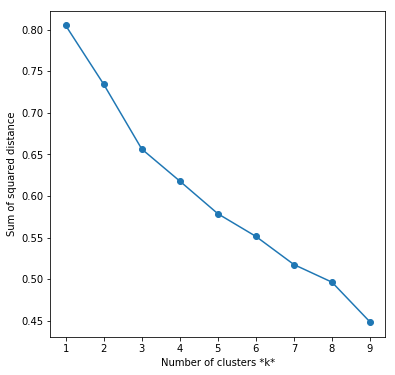

In [24]:
# Use elbow method to find out optimal number of clusters


sse = []
list_k = list(range(1, 10))

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(manhattan_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


In [25]:
#Elbow method suggests that we can craete either 3 or 4 clusters

# set number of clusters
kclusters = 4

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 2, 0, 0, 3, 2, 0])

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Discount Store,Coffee Shop,Yoga Studio,Clothing Store,Tennis Stadium,Big Box Store,Supplement Shop,Spa,Shoe Store,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Cocktail Bar,Dim Sum Restaurant,Noodle House,Salon / Barbershop,Bakery,Hotpot Restaurant,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Mobile Phone Shop,Deli / Bodega,Gym / Fitness Center,Supermarket,Spanish Restaurant,Latin American Restaurant,Mexican Restaurant,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Deli / Bodega,Lounge,Pizza Place,Restaurant,Chinese Restaurant,Frozen Yogurt Shop,Coffee Shop,Bakery
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Mexican Restaurant,Coffee Shop,Café,Pizza Place,Deli / Bodega,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


### 16. Show clusters of venues on Manhattan map. On click of any venue neighborhood and cluster label will be displayed.

In [27]:
# create map
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['red','blue','purple','darkgreen','black']

# add markers to the map
markers_colors = []

map_clusters = folium.Map(location=[manhat_lat, manhat_long], zoom_start=14)

for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters   

### 17. Read details of the rental places from the csv file

In [28]:
df_rent=pd.read_csv("rental_places.csv")
df_rent.head()

,Address,Price,Details,Lat,Long
0,EAST 47TH STREET,"$2,300",Studio | 1 BT,40.754613,-73.973734
1,265 EAST 78TH STREET,"$2,444",1 BR | 1 BT,40.772875,-73.955833
2,1680 YORK AVENUE,"$3,295",2 B | 1 BT,40.777483,-73.945756
3,304 EAST 62ND STREET,"$2,287",1 BR | 1 BT,40.762117,-73.962541
4,516 EAST 78TH STREET,"$2,200",Studio | 1 BT,40.769999,-73.949969


### 18. Show the rental places on the Manhattan map. On click of any place, rent per month,details like no of bedrooms,bathrooms etc, address will be displayed.

In [29]:
# create map
map_rental = folium.Map(location=[manhat_lat, manhat_long], zoom_start=14)
    
 # add markers to map for rental places
for lat, lng, label in zip(df_rent['Lat'], df_rent['Long'],df_rent['Price']+","+df_rent['Details']+","+df_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='green',icon='home', prefix='fa')
               ).add_to(map_rental)
   
   
map_rental

### 19. Read details of the subway stations from the csv file

In [30]:
df_stations=pd.read_csv('subway_stations.csv', sep=',')
df_stations

,stations,Lat,Long
0,103rd Street (IND Eighth Avenue Line),40.796040,-73.961420
1,103rd Street (IRT Broadway–Seventh Avenue Line),40.799419,-73.968158
2,103rd Street (IRT Lexington Avenue Line),40.790290,-73.947687
3,106th Street (Second Avenue Subway),40.790600,-73.942500
4,10th Avenue (IRT Flushing Line),40.759000,-73.996000
5,110th Street (IRT Lexington Avenue Line),40.794773,-73.944426
6,116th Street (IND Eighth Avenue Line),40.804389,-73.955412
7,116th Street (IRT Lenox Avenue Line),40.802000,-73.950000
8,116th Street (IRT Lexington Avenue Line),40.798607,-73.942022
9,116th Street (Second Avenue Subway),40.797000,-73.938000


###  20. Show the subway stations on the Manhattan map. On click of any station , station name will be displayed.

In [31]:
 # create map
map_subway = folium.Map(location=[manhat_lat, manhat_long], zoom_start=14)

   
for lat, lng, label in zip(df_stations['Lat'], df_stations['Long'],df_stations['stations']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='orange',icon='train', prefix='fa')
              ).add_to(map_subway)
map_subway   

###  21. Show subway details and rental places on a single map with a facility to check the distance between any subway station and a rental place.

In [32]:
# create map
map_subway_rental = folium.Map(location=[manhat_lat, manhat_long], zoom_start=14)

   
for lat, lng, label in zip(df_stations['Lat'], df_stations['Long'],df_stations['stations']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='orange',icon='train', prefix='fa')
              ).add_to(map_subway_rental)
    
     # add markers to map for rental places
for lat, lng, label in zip(df_rent['Lat'], df_rent['Long'],df_rent['Price']+","+df_rent['Details']+","+df_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='green',icon='home', prefix='fa')
               ).add_to(map_subway_rental)
    

map_subway_rental.add_child(MeasureControl())     
map_subway_rental 

###  22. Show clusters of venues and rental places on a single map with a facility to check the distance between a venue and a rental place.

In [33]:
# create map
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['red','blue','purple','darkgreen','black']
markers_colors = []

map_cluster_rental = folium.Map(location=[manhat_lat, manhat_long], zoom_start=14)

# show clusters of venues on the map

for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster_rental)

    
     # add markers to map for rental places
for lat, lng, label in zip(df_rent['Lat'], df_rent['Long'],df_rent['Price']+","+df_rent['Details']+","+df_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='green',icon='home', prefix='fa')
               ).add_to(map_cluster_rental)
    
map_cluster_rental.add_child(MeasureControl())      
map_cluster_rental 

### 23. Show subway details,rental places,clusters of venues on a single map with a facility to check the distance between a venue and a rental place or the distance between a rental place and a subway station.

In [34]:
# create map
map_subway_rental_cluster = folium.Map(location=[manhat_lat, manhat_long], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['red','blue','purple','darkgreen','black']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_subway_rental_cluster)
   
for lat, lng, label in zip(df_stations['Lat'], df_stations['Long'],df_stations['stations']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='orange',icon='train', prefix='fa')
              ).add_to(map_subway_rental_cluster)
    
     # add markers to map for rental places
for lat, lng, label in zip(df_rent['Lat'], df_rent['Long'],df_rent['Price']+","+df_rent['Details']+","+df_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],
              popup=label,
              icon=folium.Icon(color='green',icon='home', prefix='fa')
               ).add_to(map_subway_rental_cluster)


map_subway_rental_cluster.add_child(MeasureControl())    
map_subway_rental_cluster 



###  24. Result by using the maps,chart and examining the clusters

In [35]:
# find out count of first most common venue in each cluster

first_most_common_venue=manhattan_merged.groupby(['Cluster Labels','1st Most Common Venue']).size()
first_most_common_venue

Cluster Labels  1st Most Common Venue
0               Bakery                    1
                Clothing Store            2
                Cocktail Bar              1
                Coffee Shop               4
                Gym / Fitness Center      3
                Italian Restaurant       10
                Korean Restaurant         1
                Park                      1
                Theater                   1
                Yoga Studio               1
1               Bar                       1
2               Bar                       1
                Chinese Restaurant        1
3               African Restaurant        1
                Café                      1
                Chinese Restaurant        1
                Coffee Shop               1
                Discount Store            1
                Indian Restaurant         1
                Mexican Restaurant        4
                Sandwich Place            1
                Seafood Restaurant    

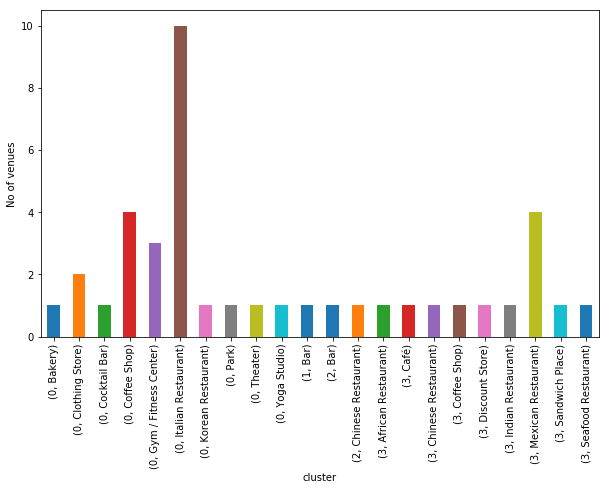

In [36]:
#Display bar chart that shows count of first most common venue in each cluster 
first_most_common_venue.plot(kind='bar',figsize=(10,6))
plt.xlabel('cluster')
plt.ylabel('No of venues')
plt.show()

In [37]:
# Cluster 0
#Cluster Label:Coffee shop venues  & Intensive Italian restaurants
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Coffee Shop,Exhibit,Art Gallery,Bakery,Juice Bar,Gym / Fitness Center,French Restaurant,Boutique,Hotel
9,Yorkville,Italian Restaurant,Coffee Shop,Gym,Bar,Pizza Place,Diner,Deli / Bodega,Mexican Restaurant,Thai Restaurant,Sushi Restaurant
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Coffee Shop,Gym / Fitness Center,Gym,Deli / Bodega,Burger Joint,Pizza Place,Sporting Goods Shop,Café
12,Upper West Side,Italian Restaurant,Bar,Vegetarian / Vegan Restaurant,Indian Restaurant,Wine Bar,Mediterranean Restaurant,Bakery,Coffee Shop,Burger Joint,Ice Cream Shop
13,Lincoln Square,Gym / Fitness Center,Theater,Café,Plaza,Concert Hall,Italian Restaurant,French Restaurant,Performing Arts Venue,Park,Opera House
14,Clinton,Theater,American Restaurant,Hotel,Gym / Fitness Center,Indie Theater,Wine Shop,Spa,Coffee Shop,Gym,Italian Restaurant
15,Midtown,Clothing Store,Hotel,Cocktail Bar,Steakhouse,Theater,Bakery,Coffee Shop,Spa,American Restaurant,Bookstore
16,Murray Hill,Coffee Shop,Hotel,Spa,French Restaurant,American Restaurant,Italian Restaurant,Bar,Sandwich Place,Gym,Japanese Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,American Restaurant,Nightclub,Hotel,Theater,Seafood Restaurant,Asian Restaurant
18,Greenwich Village,Italian Restaurant,Clothing Store,French Restaurant,Sushi Restaurant,Bakery,Café,Boutique,Seafood Restaurant,Chinese Restaurant,Indian Restaurant


In [38]:
# Cluster 1
#Cluster Label: Bar venues
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Pet Service,Baseball Field,Harbor / Marina,Farmers Market,Beer Garden,Cocktail Bar,Coffee Shop,Heliport


In [39]:
# Cluster 2
#Cluster Label: Chinese Restaurants
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Cocktail Bar,Dim Sum Restaurant,Noodle House,Salon / Barbershop,Bakery,Hotpot Restaurant,Ice Cream Shop
19,East Village,Bar,Wine Bar,Ice Cream Shop,Mexican Restaurant,Chinese Restaurant,Pizza Place,Ramen Restaurant,Cocktail Bar,Japanese Restaurant,Vegetarian / Vegan Restaurant


In [40]:
# Cluster 3
#Cluster Label: Multi-cuisine restaurants
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Discount Store,Coffee Shop,Yoga Studio,Clothing Store,Tennis Stadium,Big Box Store,Supplement Shop,Spa,Shoe Store,Seafood Restaurant
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Deli / Bodega,Gym / Fitness Center,Supermarket,Spanish Restaurant,Latin American Restaurant,Mexican Restaurant,Tapas Restaurant
3,Inwood,Mexican Restaurant,Café,Deli / Bodega,Lounge,Pizza Place,Restaurant,Chinese Restaurant,Frozen Yogurt Shop,Coffee Shop,Bakery
4,Hamilton Heights,Mexican Restaurant,Coffee Shop,Café,Pizza Place,Deli / Bodega,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio
5,Manhattanville,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Coffee Shop,Chinese Restaurant,Food & Drink Shop,Bike Trail,Sushi Restaurant,Supermarket
6,Central Harlem,African Restaurant,American Restaurant,Public Art,Gym / Fitness Center,French Restaurant,Chinese Restaurant,Seafood Restaurant,Cycle Studio,Bookstore,Ethiopian Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Latin American Restaurant,Thai Restaurant,Pet Store,Convenience Store,Dance Studio,Beer Bar,Pizza Place
11,Roosevelt Island,Sandwich Place,Coffee Shop,Park,Japanese Restaurant,Outdoors & Recreation,Greek Restaurant,Metro Station,Monument / Landmark,Supermarket,Bus Station
20,Lower East Side,Chinese Restaurant,Ramen Restaurant,Art Gallery,Coffee Shop,Café,Japanese Restaurant,Sandwich Place,Pizza Place,Park,Cocktail Bar
25,Manhattan Valley,Indian Restaurant,Pizza Place,Coffee Shop,Yoga Studio,Bar,French Restaurant,Mexican Restaurant,Café,Thai Restaurant,Hawaiian Restaurant


## By examining the above bar graph we can label each cluster as follows:

### Cluster 0 : Coffee shop venues  & Intensive Italian restaurants 
      
### Cluster 1:  Bar venues

### Cluster 2 :Chinese restaurants

### Cluster 3:  Multi-cuisine restaurants  
       

## Problem Resolution:

###  By comparing  the top 5 categories of the venues in London with these 4 clusters,  we can say that Cluster 0 resembles more to the venues in neighbourhood in London.

### By examining the map with clusters, subway stations and rental places, we can say that neighborhoods like "Yorkville","Lenox Hill","Carnegie Hill","Turtle Bay" can be ideal for selecting rental place as they have many rental places with the monthly rental between US$\$2000  and  US$\$6000,there are many subway stations situated near by these rental places and the venues around these places resemble more to the venues in the current neighborhood in London.


### The best choice among the above mentioned neighborhoods is  <u>__ Yorkville__</u> . Few options for the rental places in Yorkville with the distance to these places from the nearby subway stations is as mentioned below.

<table>
     <tr><td>Subway Stations</td><td>Rental Places</td><td>Distance</td></tr>
     <tr><td>86th Street (Second Avenue Subway)</td><td>East 83rd Street| $3695 |2 Beds </td><td>279 mt(0.17 miles)</td></tr>        <tr><td>86th Street (Second Avenue Subway)</td><td>York Avenue|\$2395|2 Beds</td><td>457 mt(0.28 miles)</td></tr>
     <tr><td>86th Street (Second Avenue Subway)</td><td>EAST 88TH STREET|\$4500|2 Beds</td><td>191 mt(0.12 miles)</td></tr>
     <tr><td>86th Street (Second Avenue Subway)</td><td>EAST 87TH STREET|\$3000|1 Bed</td><td>328 mt(0.20 miles)</td></tr>
     <tr><td>96th Street (Second Avenue Subway)</td><td>EAST 95TH STREET|\$2963|1 BR</td><td>174 mt(0.11 miles)</td></tr>
     <tr><td>96th Street (Second Avenue Subway)</td><td>East 91st street|\$4650|2 Beds</td><td>458 mt(0.28 miles)</td></tr>
     <tr><td>96th Street (Second Avenue Subway)</td><td>East 91st Street|\$4800|3 Beds</td><td>531 mt(0.33 miles)</td></tr>
     <tr><td>96th Street (Second Avenue Subway)</td><td>EAST 88TH STREET|\$4500|2 Beds</td><td>614 mt(0.38 miles)</td></tr>
     <tr><td>96th Street (Second Avenue Subway)</td><td>EAST 87TH STREET|\$3000|1 Bed</td><td>772 mt(0.48 miles)</td></tr>
     
    
</table>


